In [1]:
import numpy as np
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission

In [2]:
def compute_mse(y, tx, w):
    """Calculate the loss using mse."""
    N = y.shape[0]
    e = y - tx @ w.T
    return 1 / (2 * N) * np.linalg.norm(e) ** 2

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    e = y - tx @ w.T
    return -1 / N * tx.T @ e 

def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """Least squares using gradient descent algorithm."""
    w = initial_w
    
    for _ in range(max_iters):
        DL = compute_gradient(y, tx, w)        
        w = w - DL * gamma
        
    return w, compute_mse(y, tx, w)

def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least squares using stochastic gradient descent algorithm."""
    w = initial_w
    
    for _ in range(max_iters):        
        for yn, txn in batch_iter(y, tx, batch_size):
            DL_n = compute_stoch_gradient(yn, txn, w)
            w = w - DL_n * gamma
                        
    return w, compute_mse(y, tx, w)

def least_squares(y, tx):
    """Least squares using normal equation."""
    a = tx.T @ tx
    b = tx.T @ y
    w = np.linalg.solve(a, b)
    return w, compute_mse(y, tx, w)

def ridge_regression(y, tx, lambda_):
    """Ridge regression."""
    N = tx.shape[0]
    a = (tx.T @ tx) + 2 * N * lambda_ * np.eye(tx.shape[1])
    b = tx.T @ y
    w = np.linalg.solve(a, b)
    return w, compute_mse(y, tx, w)

def sigmoid(t):
    """Sigmoid function on t."""
    return 1 / (1 + np.exp(-t))

def calculate_loss(y, tx, w):
    """Cost by negative log likelihood."""
    sigma_tx_w = sigmoid(tx @ w)
    sum_terms = y * np.log(sigma_tx_w) + (1 - y) * np.log(sigma_tx_w)
    return -sum_terms.sum()

def calculate_gradient(y, tx, w):
    """Gradient of loss."""
    tx_w = tx @ w
    sigma_tx_w = sigmoid(tx_w)
    # print('simga_tx_w - y')
    # print(sigma_tx_w - y)
    grad = tx.T @ (sigma_tx_w - y)
    # print('tx.T')
    # print(tx.T.shape)
    return grad

import time

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    '''Logistic regression.'''
    w = initial_w
    
    for _ in range(max_iters):
        # time.sleep(3) 
        grad = calculate_gradient(y, tx, w)
        #print('grad')
        #print(grad)
        # print('w')
        # print(w)
        w = w - gamma * grad
        
    return w, calculate_loss(y, x, w)

def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iters):
        grad = calculate_gradient(y, tx, w) + lambda_ * np.sum(w)
        w = w - gamma * grad
        
    return w, calculate_loss(y, tx, w)

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

In [44]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    d = x.shape[0]
    di = int(d * ratio)
    
    per = np.random.permutation(d)
    
    xtraining = x[per][:di]
    ytraining = y[per][:di]
    xtesting = x[per][di:]
    ytesting = y[per][di:]
    
    return xtraining, ytraining, xtesting, ytesting

In [4]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    phi = np.ones((x.shape[0], 1))
    for deg in range(1, degree+1):
        phi = np.c_[phi, x ** deg]
    return phi

In [5]:
build_poly(np.array([[1, 2, 3], [4, 6, 9]]), 2)

array([[  1.,   1.,   2.,   3.,   1.,   4.,   9.],
       [  1.,   4.,   6.,   9.,  16.,  36.,  81.]])

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [ ]:
cccc = np.array([1, 2, 3, 4, 4, 2, 7, 6, 5, 3, 1, 2])
bbbb = build_k_indices(cccc, 2, 3)
aaaa = np.array([[1, 2, 3], [4, 2, 3], [5, 6, 7], [9, 0, 8], [3, 2, 4], [5, 4, 6], [4, 3, 2], [12, 3, 2], [8, 5, 3], [4, 3, 3], [1, 1, 1], [6, 78, 9]])
bbbb

In [ ]:
aaaa[bbbb]

In [ ]:
cccc[bbbb]

In [ ]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    train_indices = np.delete(k_indices, k, 0).flatten()
    test_indices = k_indices[k]
    
    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_opt, _ = ridge_regression(y_train, phi_train, lambda_)
    
    # print(w_opt)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = np.sqrt(2 * compute_mse(y_train, phi_train, w_opt))
    loss_te = np.sqrt(2 * compute_mse(y_test, phi_test, w_opt))
    
    return w_opt, loss_tr, loss_te

In [ ]:
from plots import cross_validation_visualization

def cross_validation_demo(y, x):
    seed = 1
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-10, 2, 50)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    tr = np.zeros([len(lambdas), k_fold])
    te = np.zeros([len(lambdas), k_fold])
    
    for ind, lambda_ in enumerate(lambdas):
        for k in range(k_fold):
            _, loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            tr[ind, k] = loss_tr
            te[ind, k] = loss_te
            
    rmse_tr = np.mean(tr, axis=1)
    rmse_te = np.mean(te, axis=1)
            
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)


In [6]:
yb, input_data, ids = load_csv_data('C:/Users/Thibaud/Documents/data/train.csv')

In [7]:
yb_test, input_data_test, ids_test = load_csv_data('C:/Users/Thibaud/Documents/data/test.csv')

In [8]:
input_data.shape

(250000, 30)

---------------

In [ ]:
#cross_validation(yb, input_data, build_k_indices(yb, 5, 3), 0, 0.1, 3)
cross_validation_demo(yb, input_data)

-----

------------------
### Without some columns and lines

In [ ]:
input_cleaned_columns = np.delete(input_data, [4, 5, 6, 12, 23, 24, 25, 26, 27, 28], axis=1)

In [ ]:
mask = np.all(input_cleaned_columns != -999, axis=1)
input_cleaned = input_cleaned_columns[mask]
y = (yb[mask] + 1) / 2

In [ ]:
x, mean_x, std_x = standardize(input_cleaned)

In [ ]:
np.any(input_cleaned == -999)

In [ ]:
y

In [ ]:
np.max(x), np.min(x)

In [ ]:
np.max(input_cleaned)

------------------------------
### Stantard

In [ ]:
x, _, _ = standardize(input_data)
y = (yb + 1) / 2

# SI ON VEUT LES 1
x = np.concatenate((np.ones([x.shape[0], 1]), x), axis=1)

initial_w = np.ones(x.shape[1])
gamma = 0.2 / 250000
max_iters = 2000
lambda_ = 0.1

w, loss = logistic_regression(y, x, initial_w, max_iters, gamma)
print(loss)
print(w)

In [ ]:
input_data_test_cleaned_columns = np.delete(input_data_test, [4, 5, 6, 12, 23, 24, 25, 26, 27, 28], axis=1)

In [ ]:
x_test, _, _ = standardize(input_data_test)

# SI ON VEUT LES 1
x_test = np.concatenate((np.ones([x_test.shape[0], 1]), x_test), axis=1)

y_pred = predict_labels(w, x_test)
create_csv_submission(ids_test, y_pred, 'submission_citron.csv')
y_pred.shape

In [ ]:
len(y[y == 0]) / len(y)

In [ ]:
len(y_pred[y_pred == -1]) / len(y_pred)

--------------------------------------------------------------------
### With $x^2$ marche pas

In [ ]:
x, _, _ = standardize(input_data)

x2 = np.log(x ** 2)

x = np.concatenate((x, x2), axis=1)

initial_w = np.ones(x.shape[1])
gamma = 0.2 / 250000
max_iters = 2000
lambda_ = 0.1

w, loss = logistic_regression(y, x, initial_w, max_iters, gamma)
print(loss)
print(w)

In [ ]:
x_test, _, _ = standardize(input_data_test)

x_test2 = np.log(x_test ** 2)

# SI ON VEUT LES 1
x_test = np.concatenate((x_test, x_test2), axis=1)

y_pred = predict_labels(w, x_test)
create_csv_submission(ids_test, y_pred, 'submission_citron.csv')
y_pred.shape

In [ ]:
len(y[y == 0]) / len(y)

In [ ]:
len(y_pred[y_pred == -1]) / len(y_pred)

---------------------
### Analysing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('C:/Users/Thibaud/Documents/data/train.csv', index_col=['Id'])

In [ ]:
df['nans'] = (df.drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'], axis=1) == -999).sum(1)

In [ ]:
df.groupby(['Prediction']).mean()['nans']

In [ ]:
df['not_nans'] = (df[['Prediction', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']] != -999).sum(1)

In [ ]:
df.groupby(['Prediction']).mean()['not_nans']

In [ ]:
np.all(input_data[:, [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 29]] != -999, axis=1)

In [ ]:
len(y_pred[y_pred == -1])

------------------------
# Treating data

In [32]:
def replace_nans_with_mean(arr, nan=-999):
    '''Creates a copy and replaces the nan values by the mean (without those nan values) in the column'''
    N, D = arr.shape
    copy = arr.copy()
    
    for d in range(D):
        copy[:,d][copy[:,d] == nan] = np.mean(arr[:,d][arr[:,d] != nan])
        
    return copy

In [33]:
def replace_nans_with_most_frequent(arr, nan=-999):
    '''Creates a copy and replaces the nan values by the most frequent value in the column'''
    N, D = arr.shape
    copy = arr.copy()
    
    for d in range(D):
        unique, counts = np.unique(arr[:,d], return_counts=True)
        copy[:,d][copy[:,d] == nan] = unique[np.argmax(counts[unique != nan])]
        
    return copy

In [59]:
def replace_nans_with_median(arr, nan=-999):
    '''Creates a copy and replaces the nan values by the median (without thos nan values) in the column'''
    N, D = arr.shape
    copy = arr.copy()
    
    for d in range(D):
        copy[:,d][copy[:,d] == nan] = np.median(arr[:,d][arr[:,d] != nan])
        
    return copy

In [11]:
copy_no_nans = replace_nans_with_mean(input_data)

In [12]:
copy_no_nans_2 = replace_nans_with_most_frequent(input_data)

In [13]:
copy_no_nans_2

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ...,   -1.7  ,   -2.136,   46.226],
       [  96.414,  162.172,  125.953, ...,   -1.7  ,   -2.136,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ...,   -1.7  ,   -2.136,   41.992],
       [  94.951,   19.362,   68.812, ...,   -1.7  ,   -2.136,    0.   ],
       [  96.414,   72.756,   70.831, ...,   -1.7  ,   -2.136,    0.   ]])

In [35]:
def prediction(w_train,tx,y_test):
    
    y_pred1 = predict_labels(w_train,tx)

    '''for n,i in enumerate(y_test):
        if i==0:
            y_test[n]=-1'''
            
    right = 0
    wrong = 0

    for i in range(len(y_test)):
        if y_test[i] == y_pred1[i]:
            right +=1 
        else:
            wrong +=1 
    
        
    print("Good prediction : ", right)
    print("Bad predition : " , wrong)
    print("Ratio : " ,right/len(y_test))

In [15]:
no_nans = replace_nans_with_mean(input_data)
no_nans_std, _, _ = standardize(no_nans)

y = (yb + 1) / 2

lambdas = np.logspace(-10, 0, 11)
losses = []

for lambda_ in lambdas:
    _, loss = ridge_regression(y, no_nans_std, lambda_)
    print('with lambda {0} -> loss {1}'.format(lambda_, loss))
    losses.append(loss)
    
sns.plt.semilogx(lambdas, losses)
sns.plt.show()w, _ = least_squares(y, no_nans_std)

SyntaxError: invalid syntax (<ipython-input-15-b26617f73a85>, line 15)

In [53]:
def prediction(w, x_test, y_test):
    y_pred = x_test @ w
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    
    bad = np.count_nonzero(y_pred - y_test)
    good = y_test.shape[0] - bad
    
    print('Good: ', good)
    print('Bad: ', bad)
    print('Ratio: ', good / (good + bad))

In [67]:
no_nans = replace_nans_with_mean(input_data)
no_nans_std, _, _ = standardize(no_nans)

y = (yb + 1) / 2

x_train, y_train, x_test, y_test = split_data(no_nans_std, y, 0.5)

phi = build_poly(x_train, 7)

w, _ = least_squares(y_train, phi)
prediction(w, build_poly(x_test, 7), y_test)

Good:  100472
Bad:  24528
Ratio:  0.803776


In [68]:
no_nans = replace_nans_with_median(input_data)
no_nans_std, _, _ = standardize(no_nans)

y = (yb + 1) / 2

x_train, y_train, x_test, y_test = split_data(no_nans_std, y, 0.5)

phi = build_poly(x_train, 7)

w, _ = least_squares(y_train, phi)
prediction(w, build_poly(x_test, 7), y_test)

Good:  100572
Bad:  24428
Ratio:  0.804576


-------------------
# Creating submission

In [66]:
no_nans = replace_nans_with_median(input_data)
no_nans_std, _, _ = standardize(no_nans)

y = (yb + 1) / 2

phi = build_poly(no_nans_std, 10)

w, _ = least_squares(y, phi)

no_nans_test = replace_nans_with_median(input_data_test)
no_nans_test_std, _, _ = standardize(no_nans_test)

phi_test = build_poly(no_nans_test_std, 10)

yb_pred = predict_labels(w, phi_test)
create_csv_submission(ids_test, yb_pred, 'submission_citron.csv')

reimported


---------------------
# Plotting some stuff and data analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
sns.set(style="whitegrid", color_codes=True)

In [18]:
et = np.c_[yb, copy_no_nans]

In [19]:
et

array([[  1.00000000e+00,   1.38470000e+02,   5.16550000e+01, ...,
          1.24000000e+00,  -2.47500000e+00,   1.13497000e+02],
       [ -1.00000000e+00,   1.60937000e+02,   6.87680000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   4.62260000e+01],
       [ -1.00000000e+00,   1.21858528e+02,   1.62172000e+02, ...,
         -1.18452642e-02,  -1.58228913e-03,   4.42510000e+01],
       ..., 
       [  1.00000000e+00,   1.05457000e+02,   6.05260000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   4.19920000e+01],
       [ -1.00000000e+00,   9.49510000e+01,   1.93620000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00],
       [ -1.00000000e+00,   1.21858528e+02,   7.27560000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00]])

In [20]:
df = pd.DataFrame(et[:10000])

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,...,-0.277,258.733,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497
1,-1.0,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,...,-1.916,164.546,1.0,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226
2,-1.0,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,3.148,9.336,...,-2.186,260.414,1.0,44.251000,2.053000,-2.028000,57.679474,-0.011845,-0.001582,44.251
3,-1.0,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,...,0.060,86.062,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000
4,-1.0,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,...,-0.871,53.131,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000


The columns that are correlated

In [24]:
corr = []
for i in range(0, 31):
    for j in range(i + 1, 31):
        corr.append([i, j, df[i].corr(df[j])])
        
corr_a = np.array(corr)
corr_a[np.logical_or(corr_a[:,2] > 0.8, corr_a[:,2] < -0.8)]

array([[  5.        ,   7.        ,  -0.84156628],
       [ 10.        ,  22.        ,   0.905602  ],
       [ 10.        ,  30.        ,   0.96722277],
       [ 22.        ,  30.        ,   0.88484033],
       [ 23.        ,  30.        ,   0.80952134]])

In [25]:
copy_no_nans[copy_no_nans[:,8] > 1000]

array([[  8.31240000e+01,   4.44719000e+02,   6.29900000e+01,
          2.83499900e+03,   2.40373503e+00,   3.71783360e+02,
         -8.21688171e-01,   2.89700000e+00,   2.83499900e+03,
          6.34970000e+01,   8.84000000e-01,  -1.41400000e+00,
          4.58289801e-01,   3.37120000e+01,   4.93000000e-01,
         -2.98100000e+00,   2.97860000e+01,   3.90000000e-01,
         -8.60000000e-02,   2.84261700e+03,   1.65400000e+00,
          8.27330000e+01,   0.00000000e+00,   8.48221045e+01,
         -3.27458741e-03,  -1.23928255e-02,   5.76794744e+01,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00]])

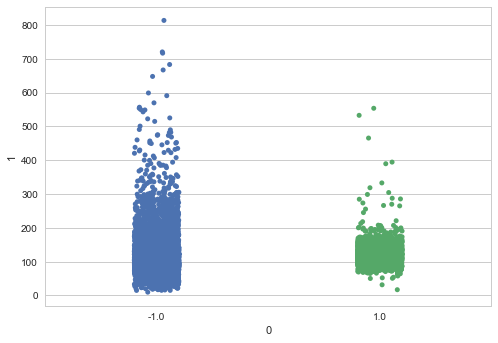

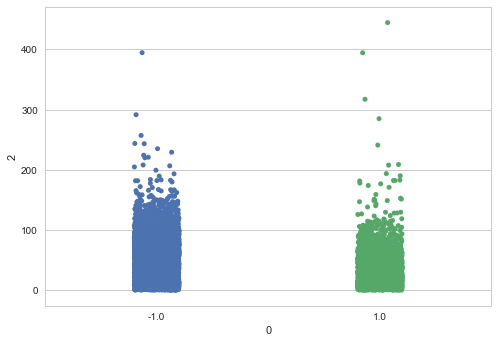

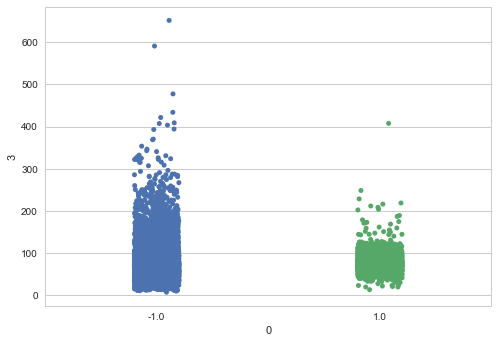

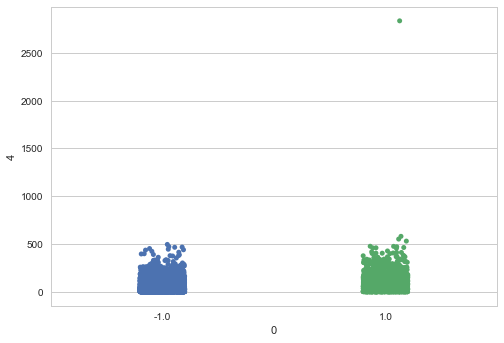

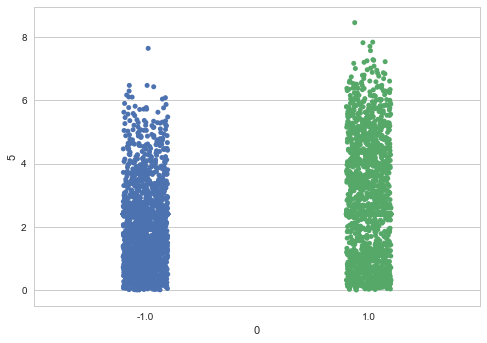

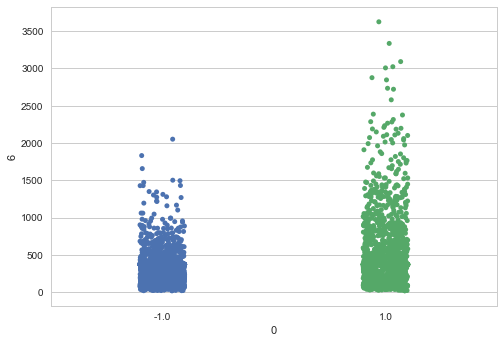

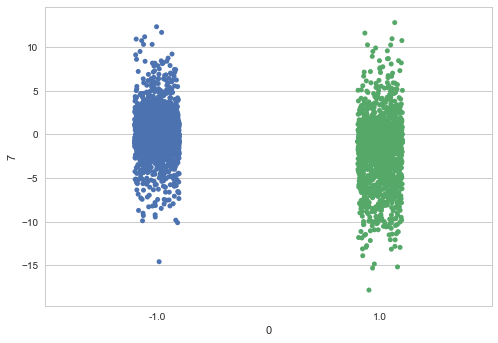

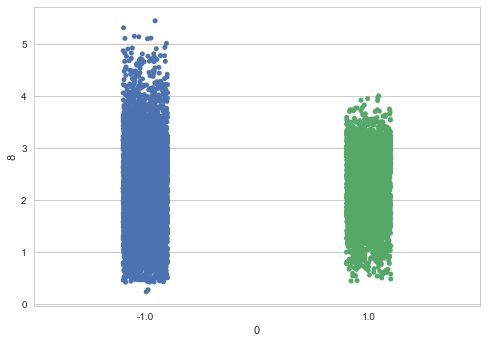

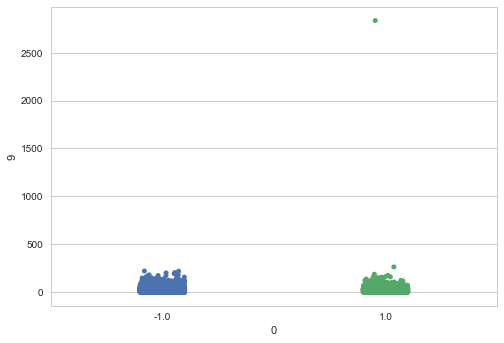

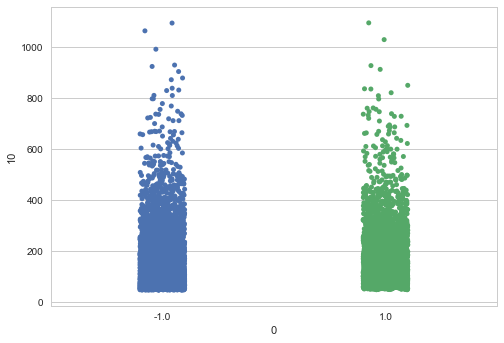

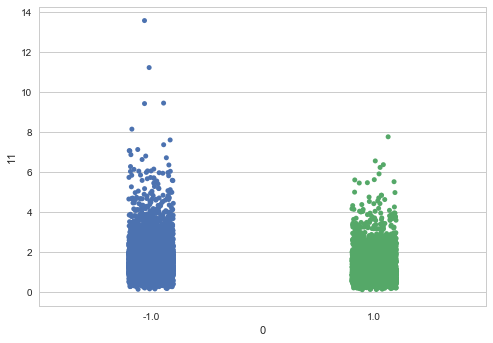

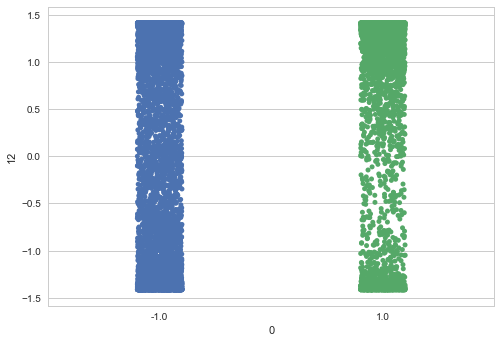

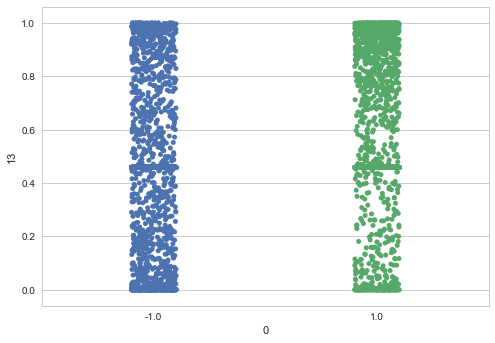

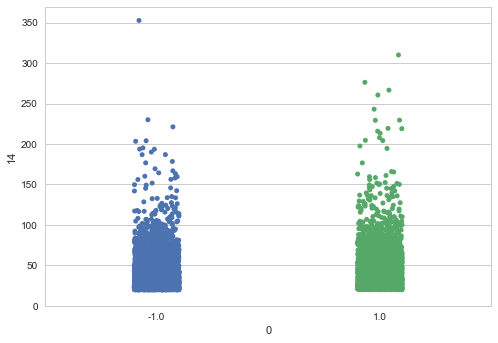

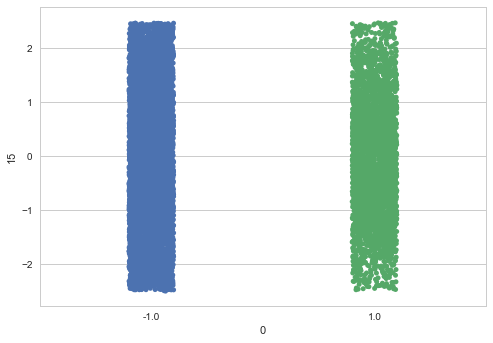

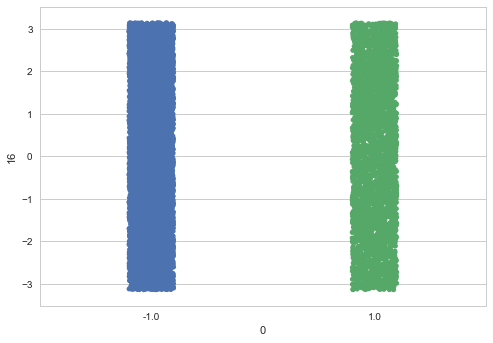

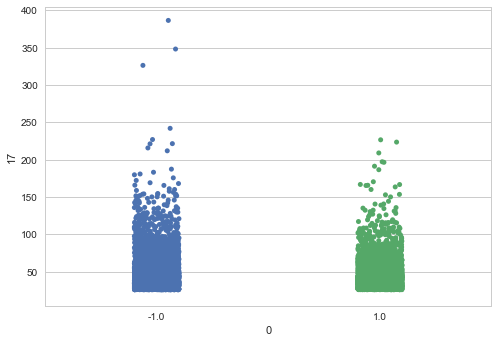

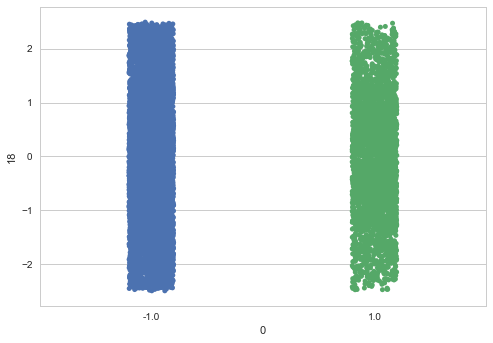

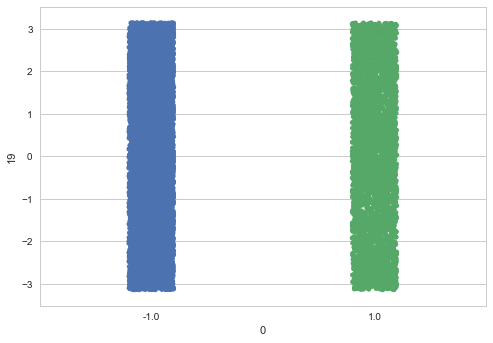

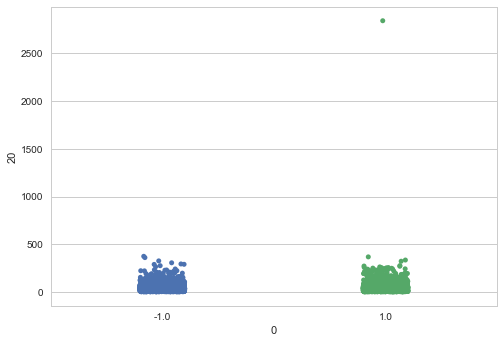

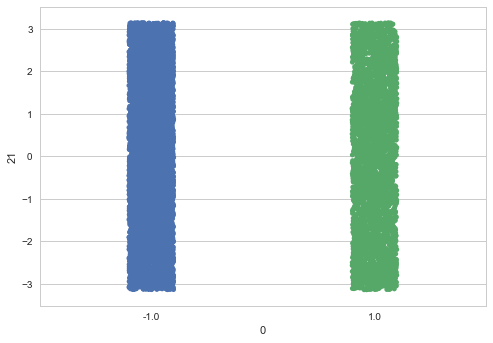

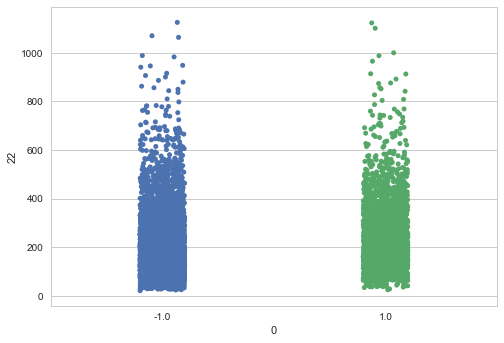

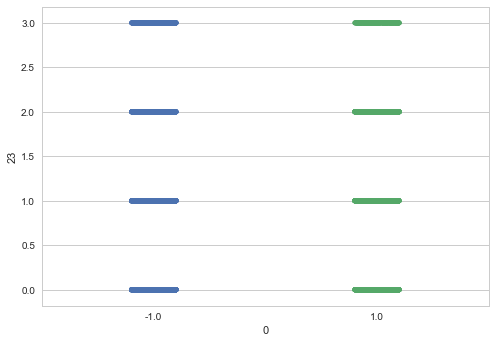

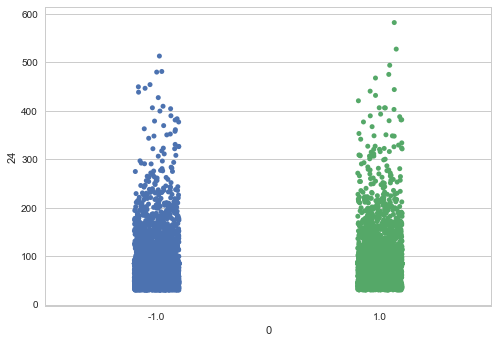

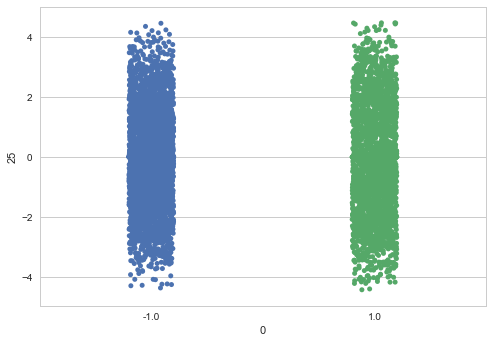

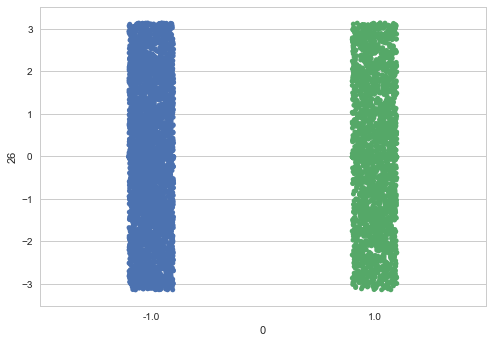

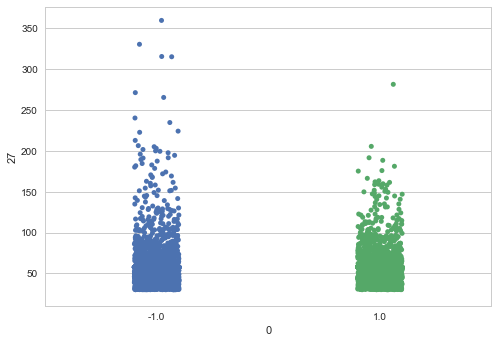

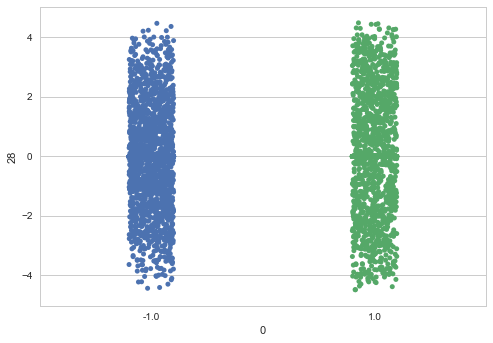

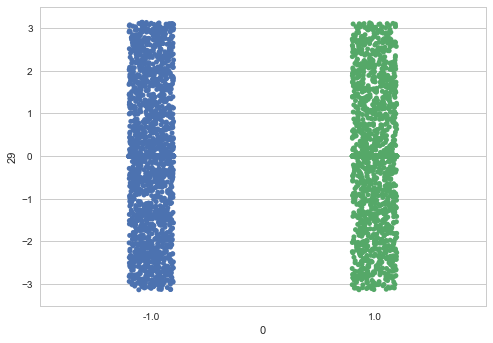

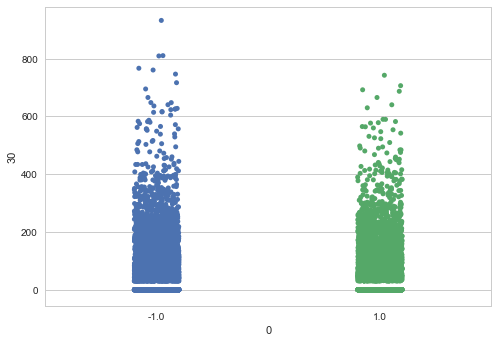

In [26]:
for i in range(1, 31):
    #sns.violinplot(x=0, y=i, data=df)
    sns.stripplot(df[0], df[i], jitter=True)
    sns.plt.show()
    #print(df[0].corr(df[i]))

In [27]:
grouped = df.groupby(by=[0]).describe()

In [28]:
grouped.T.to_csv('goruped.csv')

In [29]:
df.groupby(by=[0]).mean()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,,,,,,,,,,,,,,,,,,,,,
-1.0,120.528729,57.493828,80.842912,48.688205,2.287786,343.560275,-0.592701,2.358295,19.196248,144.991643,...,-0.009121,196.921674,0.894689,81.351492,-0.009977,-0.006144,57.632815,-0.015784,-0.001353,63.263823
1.0,123.015728,32.698492,80.430932,76.025272,2.645126,427.430969,-1.264110,2.381745,19.038564,184.108721,...,-0.037139,234.465382,1.165184,90.907873,-0.017220,-0.007039,57.428282,0.022293,-0.008589,92.415316
